<a href="https://colab.research.google.com/github/DeepuJose24/DJKeekarikattu/blob/main/Assignment_image_classification_iris_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


In [81]:
data = pd.read_csv("/content/IRIS.csv")

In [82]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
data.shape

(150, 5)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


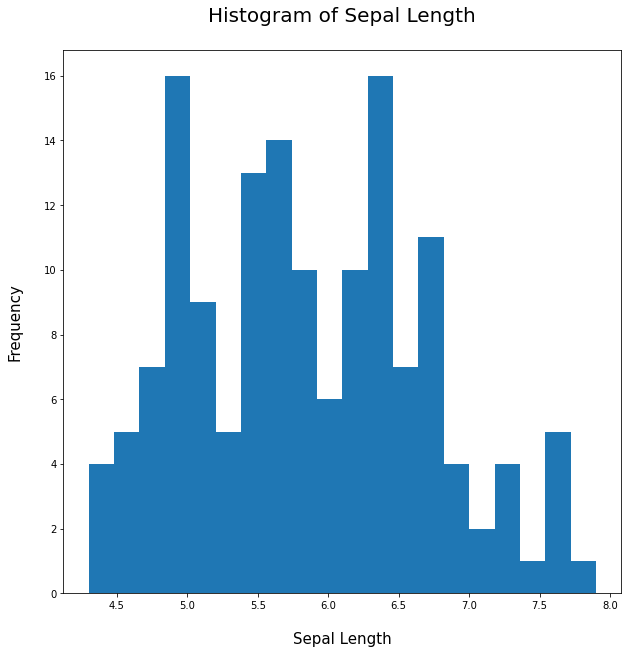

In [85]:
plt.figure(figsize=(10,10))
plt.hist(x = data['sepal_length'], bins = 20)
plt.xlabel("\nSepal Length",fontsize=15,color="black")
plt.ylabel("Frequency\n",fontsize=15,color="black")
plt.title("Histogram of Sepal Length\n",fontsize=20,color="black")
plt.show()

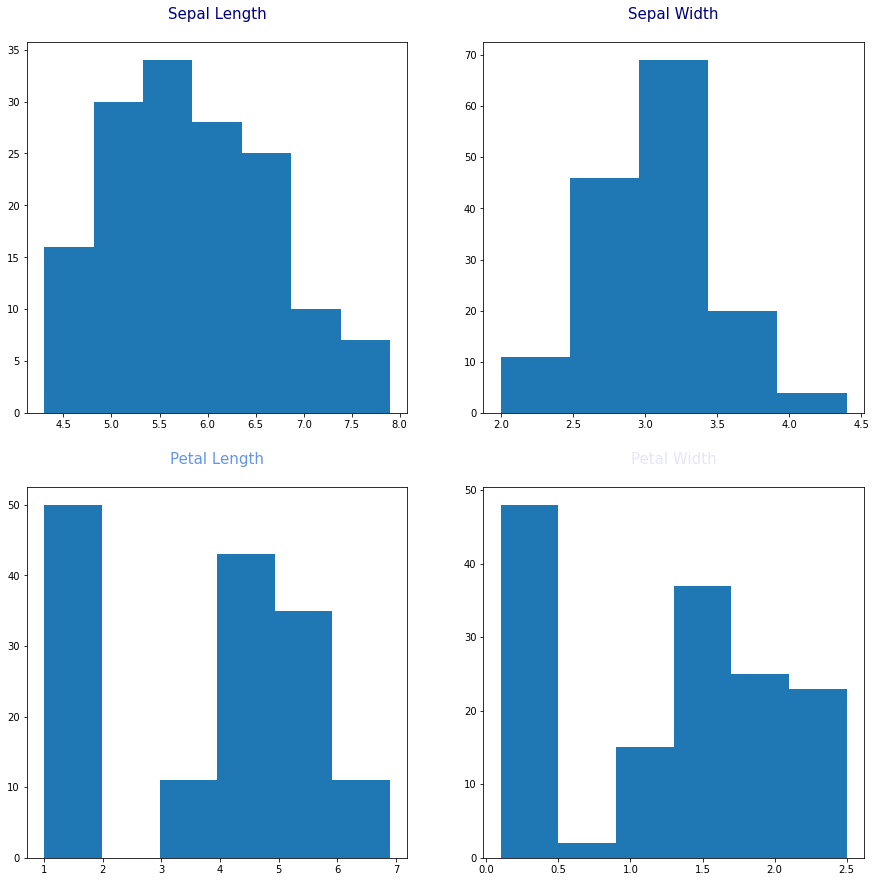

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
 
axes[0,0].set_title("Sepal Length\n",fontsize=15,color="navy")
axes[0,0].hist(data['sepal_length'], bins=7)
 
axes[0,1].set_title("Sepal Width\n",fontsize=15,color="navy")
axes[0,1].hist(data['sepal_width'], bins=5);
 
axes[1,0].set_title("Petal Length\n",color="cornflowerblue",fontsize=15)
axes[1,0].hist(data['petal_length'], bins=6);
 
axes[1,1].set_title("Petal Width\n",fontsize=15,color="lavender")
axes[1,1].hist(data['petal_width'], bins=6);

In [130]:
X=data.drop(columns=['species'])
y=data['species']


In [131]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [132]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [133]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22)


In [134]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train,y_train)
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0,fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='12',power_t=0.5,
              random_state=42, shuffle=True, tol=-np.infty, validation_fraction=0.1,
              verbose=0, warm_start=False)

SGDClassifier(max_iter=5, penalty='12', random_state=42, tol=-inf)

In [135]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

sgd_clf = SGDClassifier(random_state=42)
ranFor_clf = RandomForestClassifier(random_state=42)

In [136]:
from sklearn.model_selection import cross_val_predict
y_pred_SGD = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
y_pred_ranFor = cross_val_predict(ranFor_clf, X_train, y_train, cv=3)

In [138]:
# Precision, Recall, and F1
from sklearn.metrics import precision_score, recall_score, f1_score
sgd_metrics = [precision_score(y_train, y_pred_SGD,average='micro'), recall_score(y_train, y_pred_SGD,average='micro'), f1_score(y_train, y_pred_SGD,average='micro')]
ranFor_metrics = [precision_score(y_train, y_pred_ranFor,average='micro'), recall_score(y_train, y_pred_ranFor,average='micro'), f1_score(y_train, y_pred_ranFor,average='micro')]


In [139]:
# Display our results in a data frame
df_metrics = pd.DataFrame({'SGD_Metrics' : sgd_metrics, 'ranFor_metrics' : ranFor_metrics})
df_metrics.index = ['Precision', 'Recall', 'F1']
df_metrics


,SGD_Metrics,ranFor_metrics
Precision,0.580952,0.961905
Recall,0.580952,0.961905
F1,0.580952,0.961905


In [141]:
# Get decision scores / prediction probabilities for each prediction
y_score_SGD = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method='decision_function')
y_score_ranFor = cross_val_predict(ranFor_clf, X_train, y_train, cv=3, method='predict_proba')

In [142]:
# Get predicted probabilities of positive class (the following yields same as decision score)
y_score_ranFor = y_score_ranFor[:,1]

y_score_SGD = y_score_SGD[:,1]

In [144]:
# Compute precision and recall for all possible thresholds using a precision recall curve
from sklearn.metrics import precision_recall_curve
ndarray:y_score_SGD
prec_SGD, recall_SGD, threshold_SGD = precision_recall_curve(y_train, y_score_SGD,pos_label=1,sample_weight=None)
prec_ranFor, recall_ranFor, threshold_ranFor = precision_recall_curve(y_train, y_score_ranFor, pos_label=1,sample_weight=None)


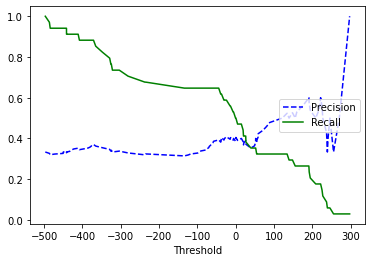

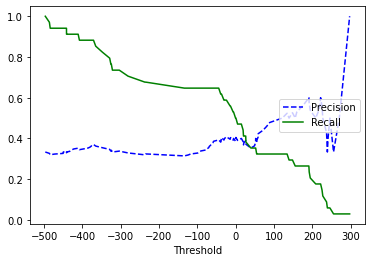

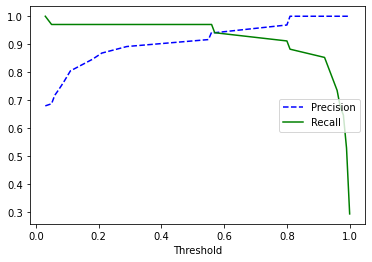

In [147]:
# plot function
def plot_PR_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center right')

plot_PR_vs_threshold(prec_SGD, recall_SGD, threshold_SGD)
plt.show()

plot_PR_vs_threshold(prec_SGD, recall_SGD, threshold_SGD)
plt.show()

plot_PR_vs_threshold(prec_ranFor, recall_ranFor, threshold_ranFor)
plt.show()

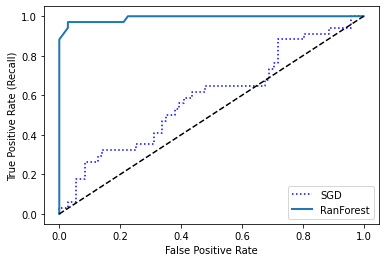

In [150]:
# Now we focus on plotting the ROC curves and determining the AUC scores

# ROC plotting function
def plot_ROC(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    
# Plot each ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr_sgd, tpr_sgd, thesholds_sgd = roc_curve(y_train, y_score_SGD, pos_label=1, sample_weight=None)
fpr_ranFor, tpr_ranFor, thresholds_ranFor = roc_curve(y_train, y_score_ranFor,pos_label=1, sample_weight=None)

plt.plot(fpr_sgd, tpr_sgd, "b:", label='SGD')
plot_ROC(fpr_ranFor, tpr_ranFor, label='RanForest')
plt.legend(loc='lower right')
plt.show()


In [145]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)


Confusion matrix for Random Forest
 [[13  0  0]
 [ 0 15  1]
 [ 0  2 14]]
accuracy_random_Forest : 0.933
precision_random_Forest : 0.933
recall_random_Forest : 0.933
f1-score_random_Forest : 0.933


Multiclassification

In [153]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=42)
ranFor_clf = RandomForestClassifier(random_state=42)
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train,y_train)
print(ovo_clf.predict(X))
print(len(ovo_clf.estimators_))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
3


In [154]:
ranFor_clf.fit(X_train, y_train)
ranFor_clf.predict(X)
print(ranFor_clf.predict_proba(X))
print(cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy"))

[[1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.99 0.01 0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.97 0.03 0.  ]
 [0.98 0.02 0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.97 0.03 0.  ]
 [1.   0.   0.  ]
 [0.99 0.01 0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.99 0.01 0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.99 0.01 0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.99 0.01 0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.99 0.01]
 [0.   0.82 0.18]
 [0.   1.   0.  ]
 [0.   0.94 0.06]
 [0.   0.9

In [155]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train,X_test, y_train, y_test=X[:600], X[600:],y[:600],y[600:]

X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled,y_train, cv=3, scoring="accuracy")

array([0.96, 0.92, 0.9 ])

In [156]:
from sklearn.metrics import confusion_matrix
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

array([[49,  1,  0],
       [ 1, 46,  3],
       [ 0,  6, 44]])

confusion_matrix_plot


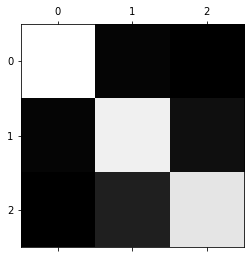

In [157]:
def plot_confusion_matrix(matrix):
  fig=plt.figure(figsize=(8,8))
  ax=fig.add_subplot(111)
  cax=ax.matshow(matrix)
plt.matshow(conf_mx,cmap=plt.cm.gray)
print("confusion_matrix_plot")  
plt.show()

confusion_matrix_errors_plot


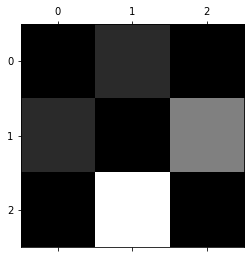

In [158]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
print("confusion_matrix_errors_plot")
plt.show()

In [159]:
cl_a,cl_b=3,5
X_aa=X_train[(y_train==cl_a) & (y_train_pred==cl_a)]
X_ab=X_train[(y_train==cl_a) & (y_train_pred==cl_b)]
X_ba=X_train[(y_train==cl_b) & (y_train_pred==cl_a)]
X_bb=X_train[(y_train==cl_b) & (y_train_pred==cl_b)]


